# <font color=red> Machine Learning Course on Coursera </font>
## Programming Exercise 1: <font color=blue>Linear Regression</font>

## <font color=green>Linear regression with one variable</font>
>In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.
>The file ex1data1.txt contains the dataset for our linear regression prob- lem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
#import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
#sns.set()

In [7]:
data1 = pd.read_csv("linearReg-ex1dat1.csv",names=['Population','Profit'])

In [8]:
#data1 = pd.DataFrame(ex1data1,columns=['Population','Profit'])
data1.head(10)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


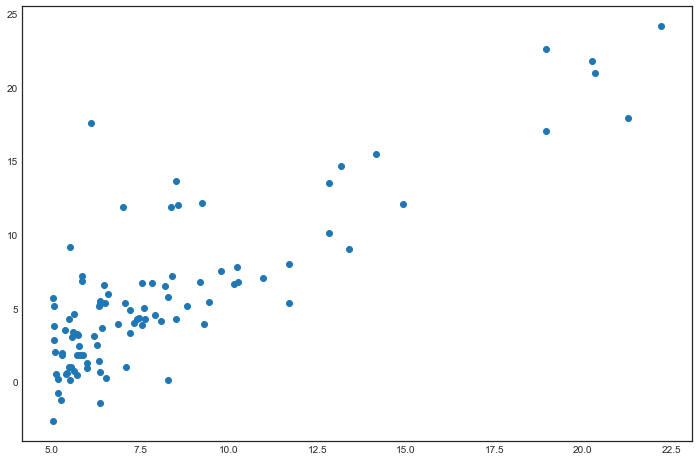

In [9]:
#plot of the Data
fig = plt.figure(figsize=(12,8))
plt.scatter(data1.Population,data1.Profit)

In [10]:
# Hypothesis function: h = theta_0 + theta_1*x
theta = np.transpose(np.matrix([-1.5,1.0])) # initialization of theta matrix
#xMat = np.transpose(np.matrix((np.ones(97),data1.Population.values))) # initialization of the X matrix
xMat = np.c_[np.ones(97),data1.Population.values] # same as previous line
yMat = np.transpose(np.matrix([data1.Profit.values])) # initialization  of the y matrix
#print(theta)
#print(xMat)
#print(yMat)

In [11]:
# Compute the Cost Function J(theta)
m = data1.Population.size #number of training example
J = [] # The cost function as a vector
error = (xMat @ theta) - yMat # What goes into the sum of the cost functionJ
J = (1/(2*m))*np.sum(np.square(error.T))
print(J)

5.089858120249485


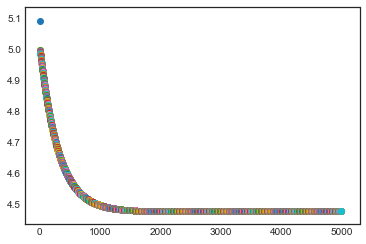

In [12]:
# Performe the batch gradient descent
#
# define the alpha parameters and number of iterations
alpha = 0.01
nIter = 500
#
# generate list of theta for plots
myTheta0 = []
myTheta1 = []
myJ = []
for i in range(nIter):
    error = (xMat @ theta) - yMat # What goes into the sum of the cost functionJ
    theta_0 = theta[0] - alpha * (1/m)*np.sum(error)
    theta_1 = theta[1] - alpha * (1/m)*np.sum(error.T @ xMat)
    #print(theta_0)
    theta[0] = theta_0
    theta[1] = theta_1
    myTheta0.append(theta_0[0,0]) 
    myTheta1.append(theta_1[0,0]) 
    #gradient = alpha * (1/m) * (error.T @ xMat)
    #theta = theta - gradient
    #theta = theta_tmp
    #print(error)
    J = (1/(2*m))*np.sum(np.square(error.T))
    myJ.append(J)
    #print(J)
    plt.scatter(i,J)

#print(theta)

In [13]:
## To make 2D plot (use a lot of mem)
#from matplotlib import cm
#
#myTheta0,myTheta1 = np.meshgrid(myTheta0,myTheta1)
#
##fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#ax.plot_surface(myTheta0,myTheta1,myJ,cmap=cm.coolwarm,linewidth=0, antialiased=True)
#ax.xlabel('Theta0')
#
#fig = plt.figure()
#ax = fig.gca(projection='3d')
#ax.plot_surface(myTheta0,myTheta1,myJ,cmap=plt.cm.viridis,linewidth=10)

### Let's get the results of the Linear Regression

In [14]:
results = xMat @ theta
#print(results)
# What is the population of your city ?
x_pop = 10.0
my_profit = theta[0] + x_pop*theta[1]
#print(my_profit[0,0])
print('The Algortihm gives the following hypothesis function:')
print('h = ',theta[0,0],' + ',theta[1,0],'times x')
print('The cost funtion gives ',J)
print('According to the population of my city, my profit would be ',my_profit[0,0], '$')

The Algortihm gives the following hypothesis function:
h =  -3.8951271445359463  +  1.1929666633737799 times x
The cost funtion gives  4.476971415095576
According to the population of my city, my profit would be  8.034539489201853 $


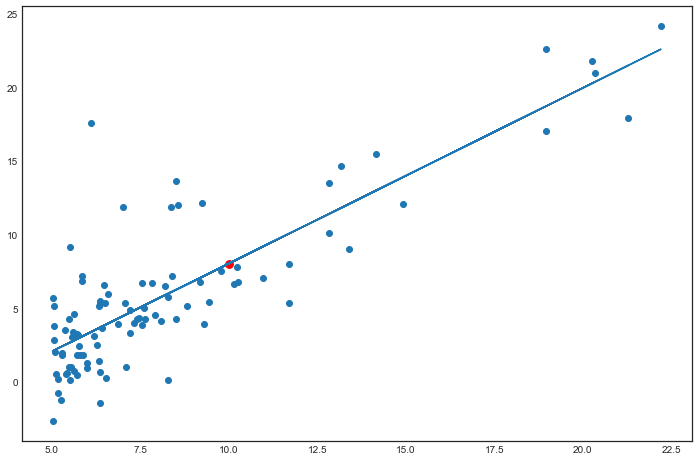

In [15]:
fig =plt.figure(figsize=(12,8))
fig = plt.figure(figsize=(12,8))
plt.scatter(data1.Population,data1.Profit)
plt.plot(data1.Population,results)
plt.scatter(x_pop,my_profit[0,0],s = 60,c='red')
plt.show()